In [ ]:
import pandas as pd
import numpy as np
import re
import string
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
!pip install textblob seaborn

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df = pd.read_csv('/content/elon_musk_tweets.csv')
df = df[['text']]
df.head()


,text
0,@BillyM2k I find the gold toe sock – inevitabl...
1,"Sock Con, the conference for socks"
2,Always something new for the magazine cover an...
3,@ExplainThisBob This guy gets it
4,Sock tech is so advanced that you can get pret...


In [ ]:
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    words = text.split()
    words = [word for word in words if word not in STOPWORDS]
    return ' '.join(words)

df['clean_text'] = df['text'].apply(clean_text)
df.head()

,text,clean_text
0,@BillyM2k I find the gold toe sock – inevitabl...,billymk find gold toe sock – inevitably kilter...
1,"Sock Con, the conference for socks",sock con conference socks
2,Always something new for the magazine cover an...,always something new magazine cover articles p...
3,@ExplainThisBob This guy gets it,explainthisbob guy gets
4,Sock tech is so advanced that you can get pret...,sock tech advanced get pretty much anything so...


In [ ]:
from textblob import TextBlob

def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.1:
        return 'positive'
    elif polarity < -0.1:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['clean_text'].apply(get_sentiment)
print(df['sentiment'].value_counts())
df.head()

sentiment
neutral     3036
positive    2297
negative     571
Name: count, dtype: int64


,text,clean_text,sentiment
0,@BillyM2k I find the gold toe sock – inevitabl...,billymk find gold toe sock – inevitably kilter...,neutral
1,"Sock Con, the conference for socks",sock con conference socks,neutral
2,Always something new for the magazine cover an...,always something new magazine cover articles p...,positive
3,@ExplainThisBob This guy gets it,explainthisbob guy gets,neutral
4,Sock tech is so advanced that you can get pret...,sock tech advanced get pretty much anything so...,positive


In [ ]:
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['clean_text']).toarray()
y = df['sentiment']
df.head()

,text,clean_text,sentiment
0,@BillyM2k I find the gold toe sock – inevitabl...,billymk find gold toe sock – inevitably kilter...,neutral
1,"Sock Con, the conference for socks",sock con conference socks,neutral
2,Always something new for the magazine cover an...,always something new magazine cover articles p...,positive
3,@ExplainThisBob This guy gets it,explainthisbob guy gets,neutral
4,Sock tech is so advanced that you can get pret...,sock tech advanced get pretty much anything so...,positive


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
df.head()

,text,clean_text,sentiment
0,@BillyM2k I find the gold toe sock – inevitabl...,billymk find gold toe sock – inevitably kilter...,neutral
1,"Sock Con, the conference for socks",sock con conference socks,neutral
2,Always something new for the magazine cover an...,always something new magazine cover articles p...,positive
3,@ExplainThisBob This guy gets it,explainthisbob guy gets,neutral
4,Sock tech is so advanced that you can get pret...,sock tech advanced get pretty much anything so...,positive


In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)
df.head()

,text,clean_text,sentiment
0,@BillyM2k I find the gold toe sock – inevitabl...,billymk find gold toe sock – inevitably kilter...,neutral
1,"Sock Con, the conference for socks",sock con conference socks,neutral
2,Always something new for the magazine cover an...,always something new magazine cover articles p...,positive
3,@ExplainThisBob This guy gets it,explainthisbob guy gets,neutral
4,Sock tech is so advanced that you can get pret...,sock tech advanced get pretty much anything so...,positive


In [ ]:
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=['positive', 'negative', 'neutral'])
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
df.head()

              precision    recall  f1-score   support

    negative       0.87      0.12      0.21       108
     neutral       0.75      0.91      0.82       614
    positive       0.84      0.77      0.80       459

    accuracy                           0.78      1181
   macro avg       0.82      0.60      0.61      1181
weighted avg       0.79      0.78      0.76      1181

Accuracy: 0.7823878069432684


,text,clean_text,sentiment
0,@BillyM2k I find the gold toe sock – inevitabl...,billymk find gold toe sock – inevitably kilter...,neutral
1,"Sock Con, the conference for socks",sock con conference socks,neutral
2,Always something new for the magazine cover an...,always something new magazine cover articles p...,positive
3,@ExplainThisBob This guy gets it,explainthisbob guy gets,neutral
4,Sock tech is so advanced that you can get pret...,sock tech advanced get pretty much anything so...,positive


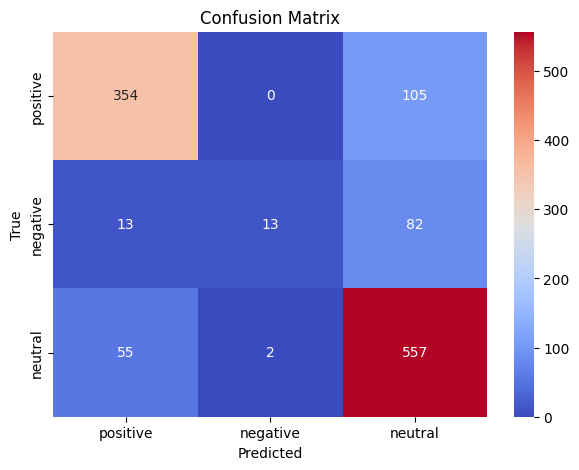

,text,clean_text,sentiment
0,@BillyM2k I find the gold toe sock – inevitabl...,billymk find gold toe sock – inevitably kilter...,neutral
1,"Sock Con, the conference for socks",sock con conference socks,neutral
2,Always something new for the magazine cover an...,always something new magazine cover articles p...,positive
3,@ExplainThisBob This guy gets it,explainthisbob guy gets,neutral
4,Sock tech is so advanced that you can get pret...,sock tech advanced get pretty much anything so...,positive


In [ ]:
sentiment_labels = ['positive', 'negative', 'neutral']
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=sentiment_labels, yticklabels=sentiment_labels, cmap="coolwarm")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
df.head()

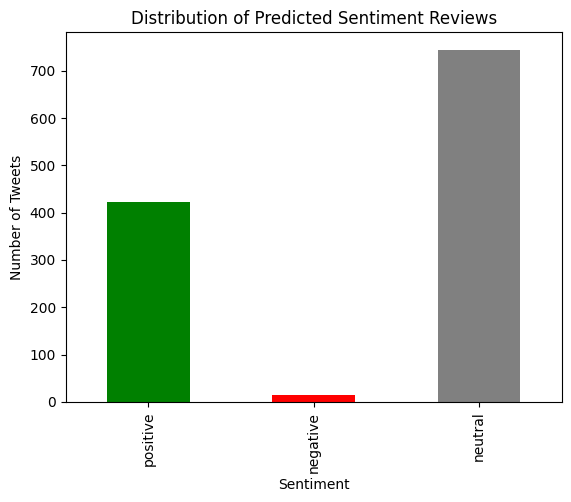

,text,clean_text,sentiment
0,@BillyM2k I find the gold toe sock – inevitabl...,billymk find gold toe sock – inevitably kilter...,neutral
1,"Sock Con, the conference for socks",sock con conference socks,neutral
2,Always something new for the magazine cover an...,always something new magazine cover articles p...,positive
3,@ExplainThisBob This guy gets it,explainthisbob guy gets,neutral
4,Sock tech is so advanced that you can get pret...,sock tech advanced get pretty much anything so...,positive


In [ ]:
sentiment_counts = pd.Series(y_pred).value_counts()
sentiment_counts = sentiment_counts.reindex(sentiment_labels, fill_value=0)
sentiment_counts.plot(kind='bar', color=['green', 'red', 'grey'])
plt.title('Distribution of Predicted Sentiment Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()
df.head()

In [ ]:
for sentiment in sentiment_labels:
    print(f"\n--- {sentiment.upper()} Sample Reviews ---")
    print(df[df['sentiment'] == sentiment]['text'].head(3).to_string(index=False))
df.head()


--- POSITIVE Sample Reviews ---
Always something new for the magazine cover and...
Sock tech is so advanced that you can get prett...
   I must confess to a penchant for creative socks

--- NEGATIVE Sample Reviews ---
@historydefined While bleak posts maybe generat...
Without a common goal, \nhumanity will fight it...
@cb_doge Not bad! \n\nIt is high time that the ...

--- NEUTRAL Sample Reviews ---
@BillyM2k I find the gold toe sock – inevitably...
                Sock Con, the conference for socks
                  @ExplainThisBob This guy gets it


,text,clean_text,sentiment
0,@BillyM2k I find the gold toe sock – inevitabl...,billymk find gold toe sock – inevitably kilter...,neutral
1,"Sock Con, the conference for socks",sock con conference socks,neutral
2,Always something new for the magazine cover an...,always something new magazine cover articles p...,positive
3,@ExplainThisBob This guy gets it,explainthisbob guy gets,neutral
4,Sock tech is so advanced that you can get pret...,sock tech advanced get pretty much anything so...,positive
